In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'
import os
os.environ["KERAS_BACKEND"] = "jax"
os.environ["JAX_PLATFORMS"] = "cpu"
import sys
sys.path.append('../')
from pathlib import Path
import numpy as np
import random as rd
import utils as u
import visualizer as v
import simulation_models.modelloader as ml
import matplotlib.pyplot as plt
from collections import defaultdict
# set random seed
rd.seed(0)
np.random.seed(0)

In [2]:
results_path = Path("../results/log_sin-parameter_posterior")

In [3]:
# find all folders with results in results_path
folders = [f.resolve() for f in results_path.iterdir() if f.is_dir() and f.name[0].isdigit()]
print(folders)
nested_dict = lambda: defaultdict(nested_dict)
parameter_draws_dict = nested_dict()
out_params_dict = nested_dict()
out_datasets_dict = nested_dict()
path_dict = nested_dict()
# load parameter draws in respective folders
for folder in folders:
    config_file = list(folder.glob("*.json"))[0]
    config = u.read_config(config_file)
    draws = u.load_draws(folder)
    out_params = u.load_out(folder)[1]
    out_datasets = u.load_out(folder)[0]
    parameter_draws_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_pce.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = draws
    out_params_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_pce.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = out_params
    out_datasets_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_pce.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = out_datasets
    
    path_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_pce.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = folder

[PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_18-13-45'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_18-10-32'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_19-51-53'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_18-12-28'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_19-37-34'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-05-02_11-16-44'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_20-08-06'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_19-09-24'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_posterior/2025-03-24_19-22-46'), PosixPath('/data/homes/reiser/projects/sabi/results/log_sin-parameter_po

In [4]:
out_params_dict_ = out_params_dict['bayesian_pce']['mcmc']['sigma_a=True']['low_budget=False']

In [5]:

data_to_plot = {
    "ABI": 
    {
        "True Model": parameter_draws_dict['true_model']['abi']['sigma_a=False']['low_budget=False']['w'],
        "True Model (Low Budget)": parameter_draws_dict['true_model']['abi']['sigma_a=False']['low_budget=True']['w'],
        "Surrogate Model": parameter_draws_dict['bayesian_point_pce']['abi']['sigma_a=False']['low_budget=False']['w'],
        "Uncertainty-Aware Surrogate Model": parameter_draws_dict['bayesian_pce']['abi']['sigma_a=True']['low_budget=False']['w']
    },
    "MCMC": 
    {
        "True Model": parameter_draws_dict['true_model']['mcmc']['sigma_a=False']['low_budget=False']['w'],
        "True Model (Low Budget)": parameter_draws_dict['true_model']['mcmc']['sigma_a=False']['low_budget=False']['w'],
        "Surrogate Model": parameter_draws_dict['bayesian_point_pce']['mcmc']['sigma_a=False']['low_budget=False']['w'],
        "Uncertainty-Aware Surrogate Model": parameter_draws_dict['bayesian_pce']['mcmc']['sigma_a=True']['low_budget=False']['w']
    }
}
out_params_dict_plot = {
    "True Model": out_params_dict_['w'],
    "True Model (Low Budget)": out_params_dict_['w'],
    "Surrogate Model": out_params_dict_['w'],
    "Uncertainty-Aware Surrogate Model": out_params_dict_['w']
}

labels = {
    "ABI":
    {
        "True Model": "Full-budget ABI",
        "True Model (Low Budget)": "Low-budget ABI",
        "Surrogate Model": "SABI",
        "Uncertainty-Aware Surrogate Model": "UA-SABI"
    },
        "MCMC":
    {
        "True Model": "MCMC",
        "True Model (Low Budget)": "MCMC",
        "Surrogate Model": "Point",
        "Uncertainty-Aware Surrogate Model": "E-Post"
    }
}

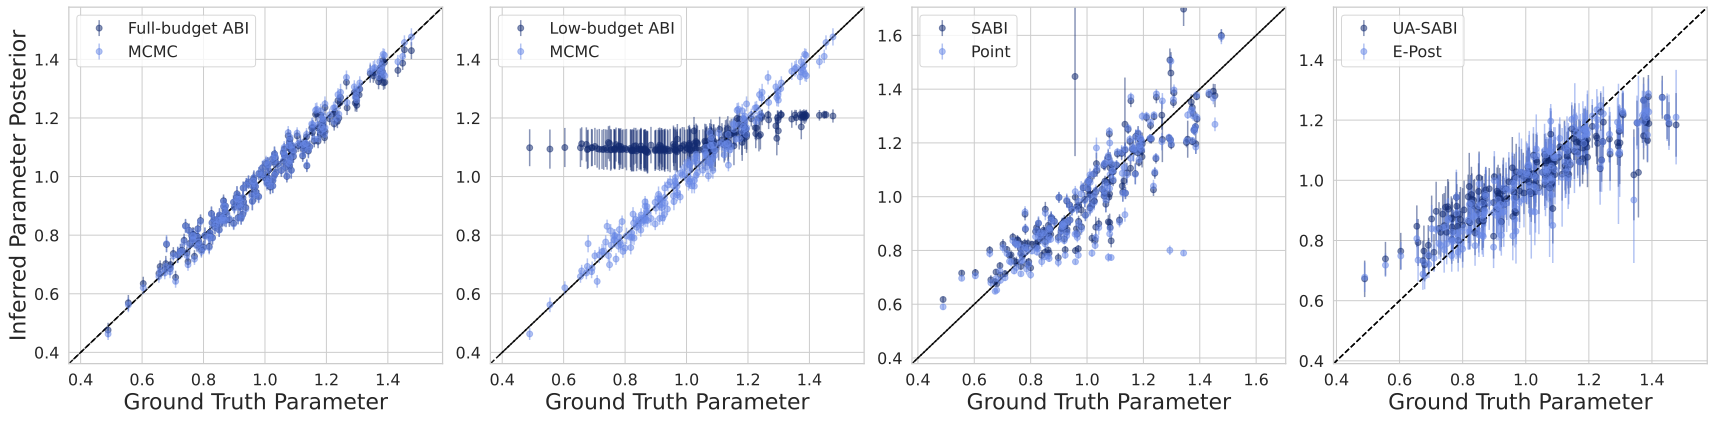

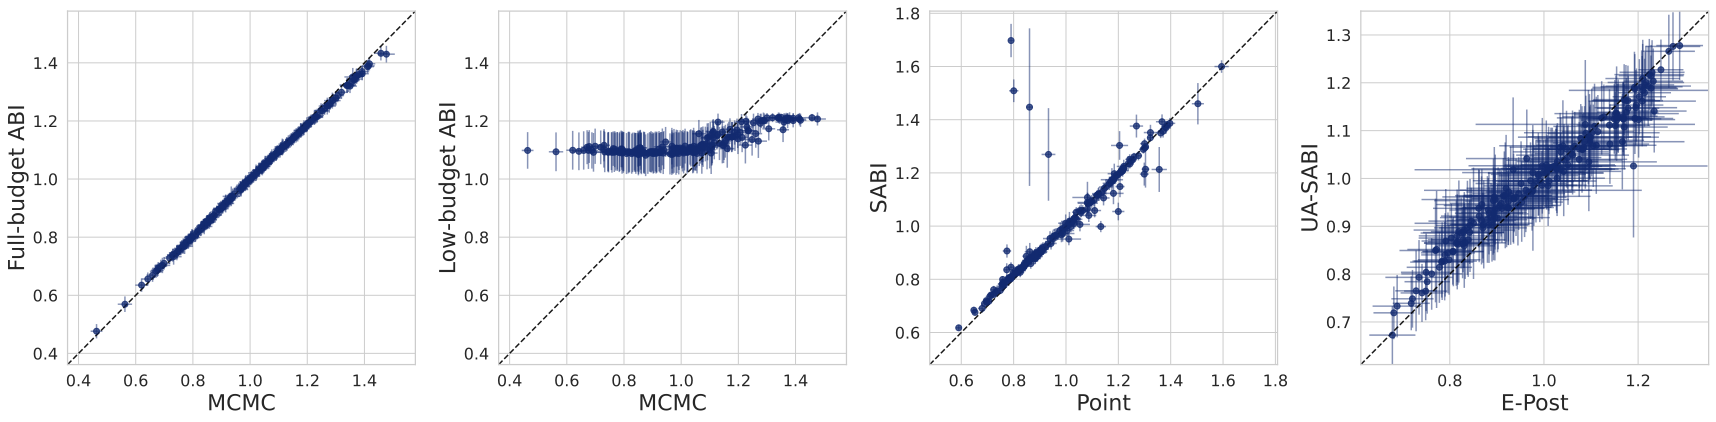

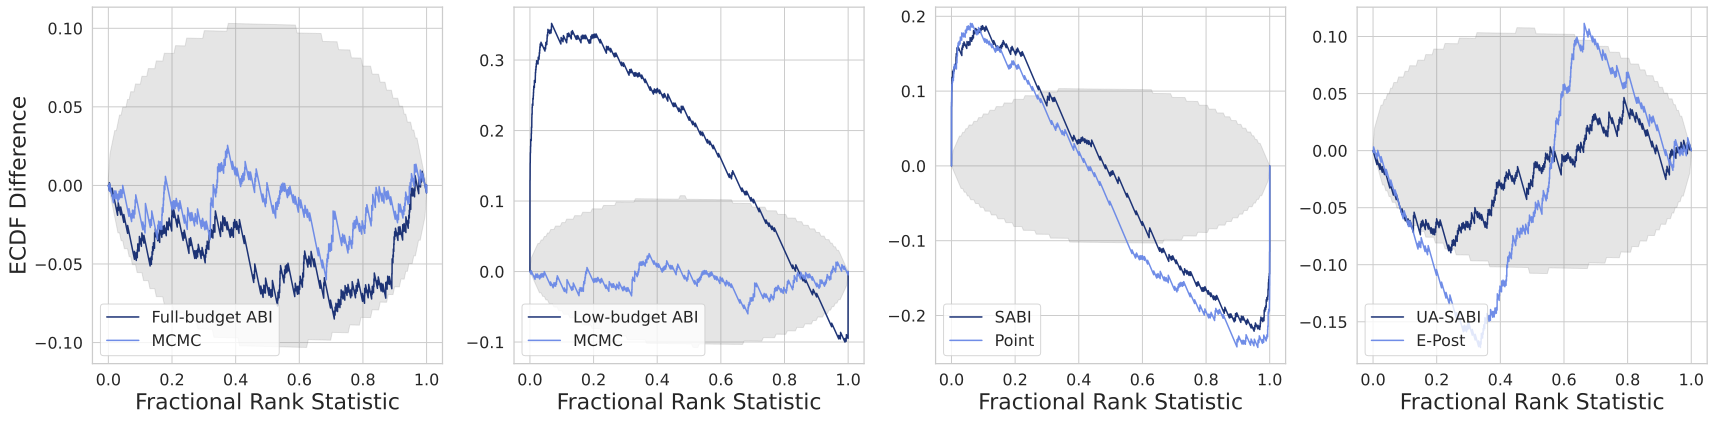

In [6]:
config.output_path = results_path
vis = v.Visualizer(config)
vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels)
vis.compare_posterior_parameter_mcmc_abi(out_params_dict_plot, data_to_plot, height=6, labels=labels)
vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels)

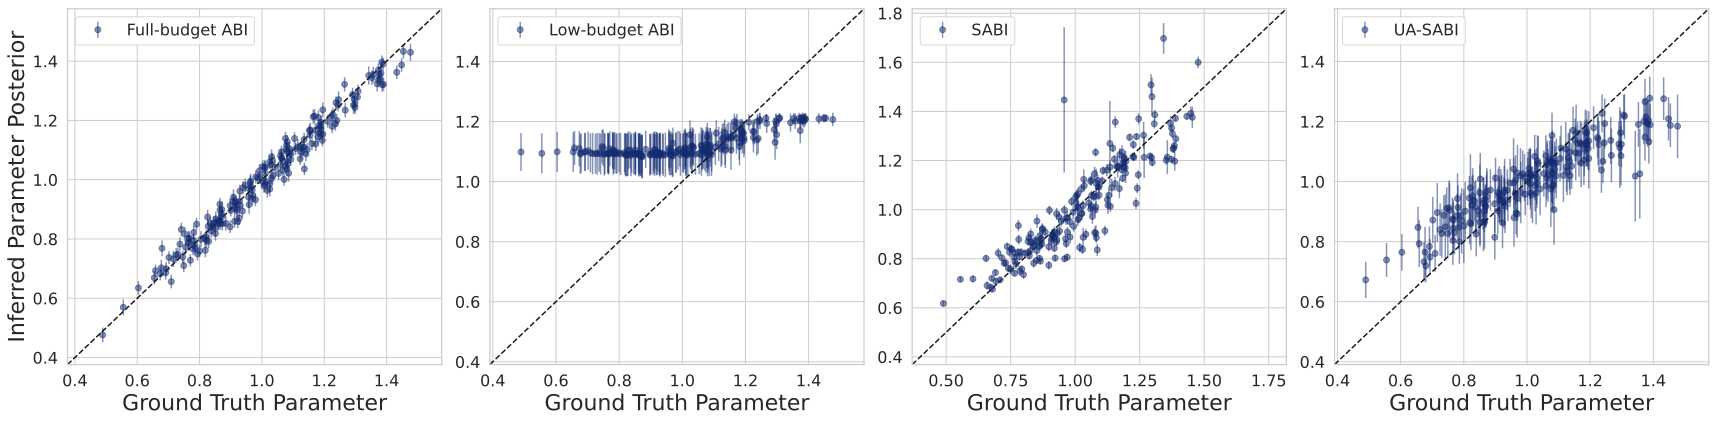

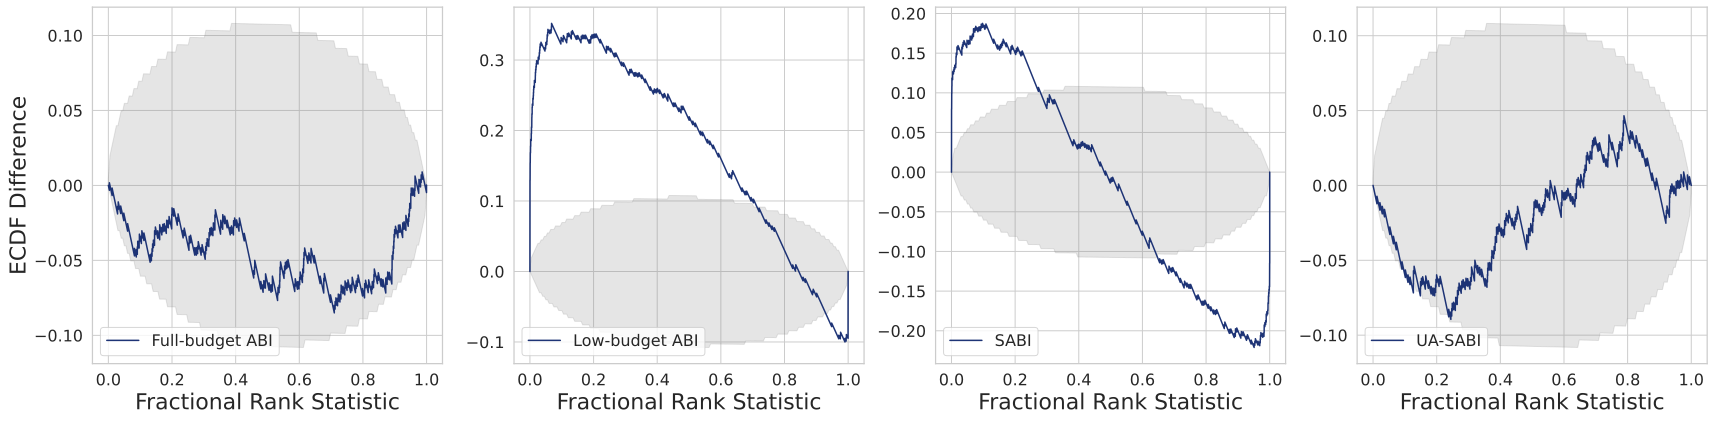

In [ ]:

data_to_plot = {
    'ABI': 
    {   
        "True Model": parameter_draws_dict['true_model']['abi']['sigma_a=False']['low_budget=False']['w'],
        "True Model (Low Budget)": parameter_draws_dict['true_model']['abi']['sigma_a=False'][low_budget=True']['w'],
        "Surrogate Model": parameter_draws_dict['bayesian_point_pce']['abi']['sigma_a=False']['low_budget=False']['w'],
        "Uncertainty-Aware Surrogate Model": parameter_draws_dict['bayesian_pce']['abi']['sigma_a=True']['low_budget=False']['w']
    }
}
out_params_dict_plot = {
    "True Model": out_params_dict_['w'],
    "True Model (Low Budget)": out_params_dict_['w'],
    "Surrogate Model": out_params_dict_['w'],
    "Uncertainty-Aware Surrogate Model": out_params_dict_['w']
}

labels = {
    "ABI":
    {
        "True Model": "Full-budget ABI",
        "True Model (Low Budget)": "Low-budget ABI",
        "Surrogate Model": "SABI",
        "Uncertainty-Aware Surrogate Model": "UA-SABI"
    }
}

vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels)
vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels)

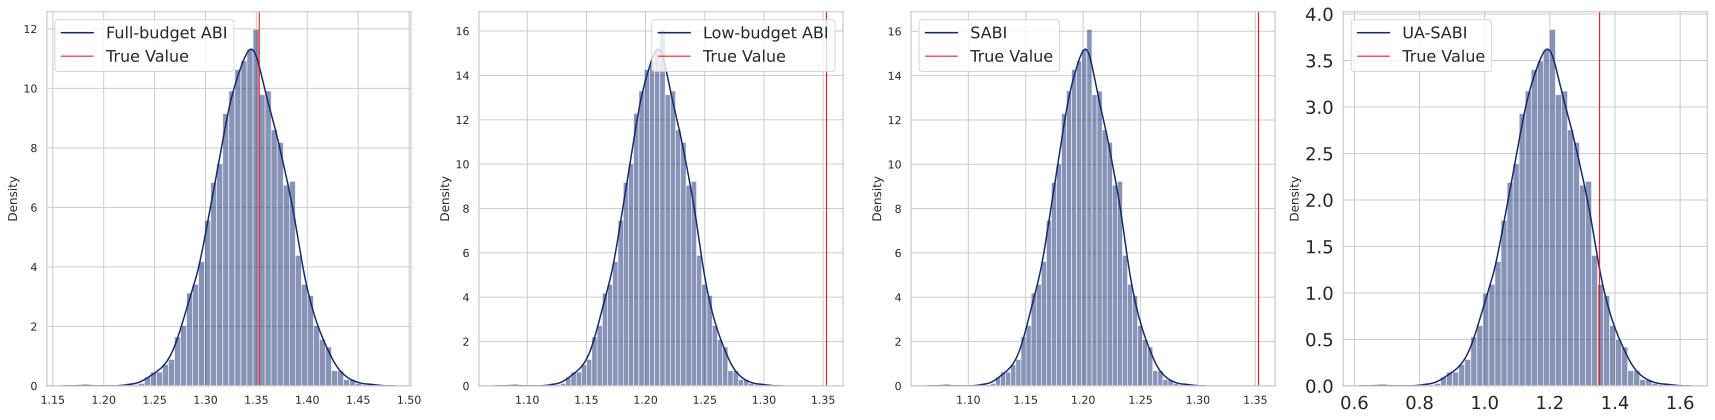

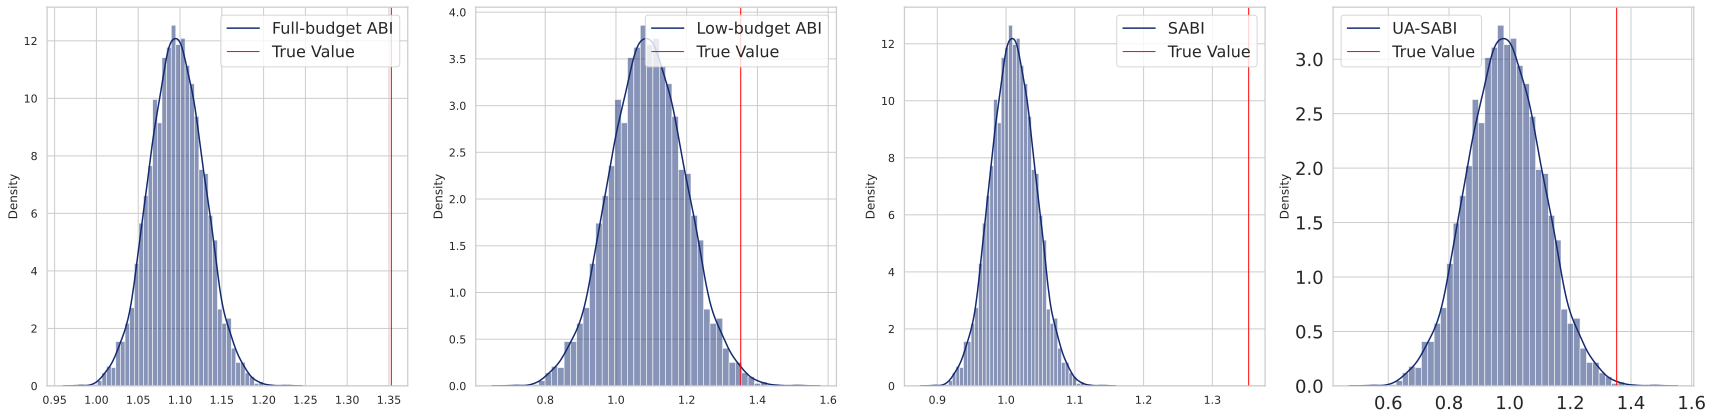

In [14]:
vis.compare_posterior_parameter_sample(out_params_dict_plot, data_to_plot,2, height=6, labels=labels, hist=True)

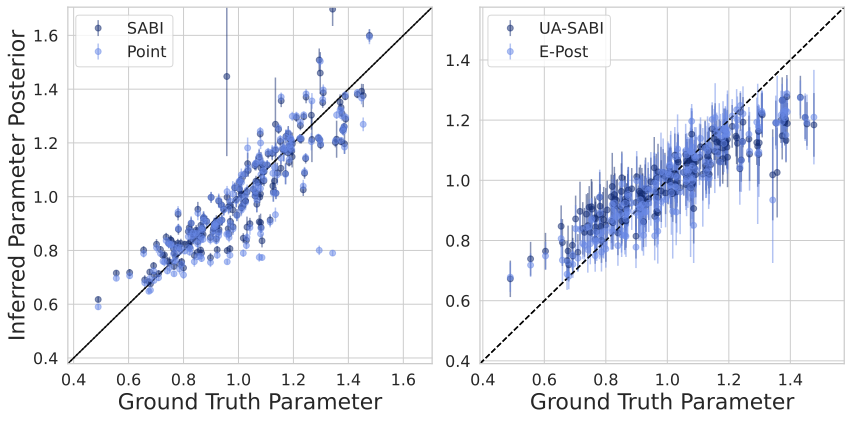

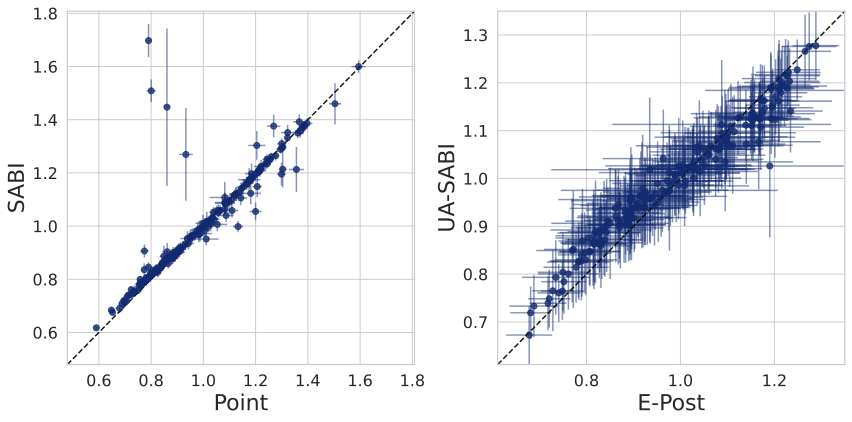

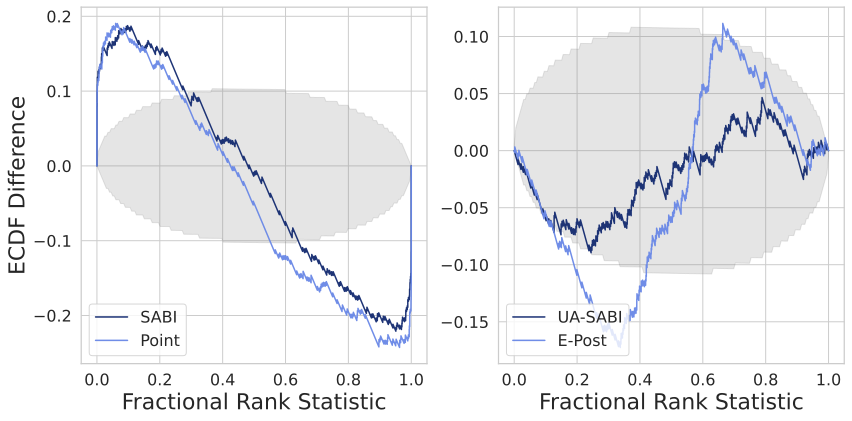

In [ ]:

data_to_plot = {
    "ABI": 
    {
        "Surrogate Model": parameter_draws_dict['bayesian_point_pce']['abi']['sigma_a=False']['low_budget=False']['w'],
        "Uncertainty-Aware Surrogate Model": parameter_draws_dict['bayesian_pce']['abi']['sigma_a=True']['low_budget=False']['w']
    },
    "MCMC": 
    {
        "Surrogate Model": parameter_draws_dict['bayesian_point_pce']['mcmc']['sigma_a=False']['low_budget=False']['w'],
        "Uncertainty-Aware Surrogate Model": parameter_draws_dict['bayesian_pce']['mcmc']['sigma_a=True']['low_budget=False']['w']
    }
}
out_params_dict_plot = {
    "Surrogate Model": out_params_dict_['w'],
    "Uncertainty-Aware Surrogate Model": out_params_dict_['w']
}

labels = {
    "ABI":
    {
        "Surrogate Model": "SABI",
        "Uncertainty-Aware Surrogate Model": "UA-SABI"
    },
    "MCMC":
    {
        "Surrogate Model": "Point",
        "Uncertainty-Aware Surrogate Model": "E-Post"
    }
}

vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels)
vis.compare_posterior_parameter_mcmc_abi(out_params_dict_plot, data_to_plot, height=6, labels=labels)
vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels)